In [12]:
import dicom
import os
import numpy as np
import glob
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
from PIL import Image
from scipy.misc import imrotate
import pandas as pd
from scipy import stats

In [2]:
#Function to find the theta to rotate the image around for each image
def findTheta(o):
    T=[]
    for i in range(len(o)):
        o1 = o[i][:3];
        o2 = o[i][3:];
        oh = np.cross(o1,o2);
        or1 = np.asarray([0.6,0.6,-0.2]);
        o2new = np.cross(oh,or1);
        theta = np.arccos(np.dot(o2,o2new)/np.sqrt(np.sum([i ** 2 for i in o2])*np.sum([i ** 2 for i in o2new])))*180/3.1416
        theta = theta * np.sign(np.dot(oh,np.cross(o2,o2new)));
        T.append(theta)
    
    return T

In [3]:
# Read in the metadata excel file 
MetaData=pd.read_excel('ALL_Merged_Path_except_ACDC.xlsx')

In [4]:
# Get the sax_image metadata 
sax_img=MetaData[MetaData['Image info'].str.contains('sax') | MetaData['Source'].str.contains('Sunny')]
sax_img_Kaggle=MetaData[MetaData['Image info'].str.contains('sax')]
sax_img_Sunny=MetaData[MetaData['Source'].str.contains('Sunny')]

In [5]:
# Convert to list
#IOP_all=MetaData['ImageOrientationPatient'].tolist()
IOP_sax=sax_img['ImageOrientationPatient'].tolist()
IOP_sax_Kaggle=sax_img_Kaggle['ImageOrientationPatient'].tolist()
IOP_sax_Sunny=sax_img_Sunny['ImageOrientationPatient'].tolist()

In [6]:
# Function to convert unicode array to an array of floats 
def convertUnicode(IOP):
    orient_pat=[]
    for i in range(len(IOP)):
        #print i
        tmp=[]
        a=str(IOP[i])
        #print a
        a=a.split(',')
        a=[i.strip('\[') for i in a]
        a=[i.strip('\]') for i in a]
        a=[i.strip('\'') for i in a]
        for j in range(len(a)):
            if j==0:
                #print j, a[j]
                t=float(a[j])
            else:
                #print j, a[j][2:]
                t=float(a[j][2:])
            tmp.append(t)
        orient_pat.append(tmp)
    return orient_pat

In [7]:
# Get the theats for each sax slice
#thetas_all=findTheta(convertUnicode(IOP_all))
thetas_sax=findTheta(convertUnicode(IOP_sax))
thetas_sax_Kaggle=findTheta(convertUnicode(IOP_sax_Kaggle))
thetas_sax_Sunny=findTheta(convertUnicode(IOP_sax_Sunny))

In [8]:
# Prints the min, median, mode, and max for the thetas for the K+S, K and S datasets
Min=np.min(thetas_sax)
median=np.median(thetas_sax)
mode=stats.mode(thetas_sax)
Max=np.max(thetas_sax)
Min_Kaggle=np.min(thetas_sax_Kaggle)
median_Kaggle=np.median(thetas_sax_Kaggle)
mode_Kaggle=stats.mode(thetas_sax_Kaggle)
Max_Kaggle=np.max(thetas_sax_Kaggle)
Min_Sunny=np.min(thetas_sax_Sunny)
median_Sunny=np.median(thetas_sax_Sunny)
mode_Sunny=stats.mode(thetas_sax_Sunny)
Max_Sunny=np.max(thetas_sax_Sunny)
print "Kaggle & Sunny: min: %s median: %s mode: %s max: %s" %(Min, median,mode, Max)
print "Kaggle: min: %s median: %s mode: %s max: %s" %(Min_Kaggle, median_Kaggle,mode_Kaggle, Max_Kaggle)
print "Sunny: min: %s median: %s mode: %s max: %s" %(Min_Sunny, median_Sunny, mode_Sunny,Max_Sunny)
                                                    

Kaggle & Sunny: min: -140.748417126 median: -5.92374306814 mode: ModeResult(mode=array([ 44.99989477]), count=array([6413])) max: 166.733289841
Kaggle: min: -42.7883000329 median: -8.82906014642 mode: ModeResult(mode=array([-11.67612435]), count=array([990])) max: 84.4538311468
Sunny: min: -140.748417126 median: 27.5373403901 mode: ModeResult(mode=array([ 44.99989477]), count=array([6263])) max: 166.733289841


(array([  2.51000000e+02,   0.00000000e+00,   2.21800000e+03,
          2.03820000e+04,   1.69032000e+05,   2.61830000e+04,
          5.55310000e+04,   5.01200000e+03,   2.40000000e+02,
          1.56000000e+02]),
 array([-140.74841713, -110.00024643,  -79.25207573,  -48.50390504,
         -17.75573434,   12.99243636,   43.74060705,   74.48877775,
         105.23694845,  135.98511914,  166.73328984]),
 <a list of 10 Patch objects>)

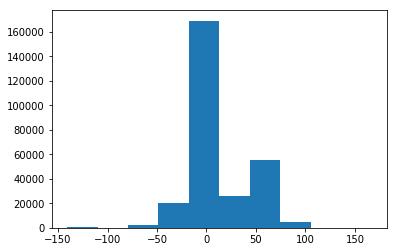

In [13]:
#Plots histogram of the theats
plt.hist(thetas_sax, bins=10)

This shows the angles that each image is rotated around